# Kaplan-Meier Estimator

The Kaplan-Meier estimator is a non-parametric estimator of the survival function of lifetime data that can be used even in the presence of right-censoring.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", palette="muted", color_codes=True)

from survive import datasets
from survive.univariate import KaplanMeier

## Example 1. Leukemia Remission Times

These data are the times of remission (in weeks) of leukemia patients in a control group and in a treatment group, taken from Table 1.1 of Cox and Oakes (1984). Due to the presence of right-censoring in the treatment group, each observation has a censoring indicator (the `Event` column), where `0` indicates right-censoring (e.g., the patient dropped out of the study or the study ended before the patient's remission time was observed) and `1` indicates a true event (i.e., remission).

We display the first fifteen observations to show the structure of the data.

In [2]:
leukemia = datasets.leukemia()
print(leukemia.head(n=15).to_string(index=False))

Time  Event      Group
   1      1    Control
   1      1    Control
   2      1    Control
   2      1    Control
   3      1    Control
   4      1    Control
   4      1    Control
   5      1    Control
   5      1    Control
   6      0  Treatment
   6      1  Treatment
   6      1  Treatment
   6      1  Treatment
   7      1  Treatment
   8      1    Control


We can fit a Kaplan Meier estimator to the leukemia data using the `KaplanMeier` class in the `survive.univariate` module.
Once we specify that our data is comping from the leukemia DataFrame (by setting `data=leukemia` in the call to `fit()`), we can specify the names of the columns from which to get the observed time, censoring indicators, and group labels.

In [3]:
km_leukemia = KaplanMeier()
km_leukemia.fit("Time", status="Event", group="Group", data=leukemia)

KaplanMeier(conf_type='log-log', conf_level=0.95, var_type='greenwood')

The `summary` property of a `KaplanMeier` object is a structure containing descriptive statistics and survival tables for each group.

In [4]:
print(km_leukemia.summary)

KaplanMeier(conf_type='log-log', conf_level=0.95, var_type='greenwood')

Kaplan-Meier estimator

         observations  events  censored
Control            21      21         0

time  at risk  events  survival  std. err.  95% c.i. lower  95% c.i. upper
   1       21       2  0.904762   0.064056        0.670046        0.975294
   2       19       2  0.809524   0.085689        0.568905        0.923889
   3       17       1  0.761905   0.092943        0.519391        0.893257
   4       16       2  0.666667   0.102869        0.425350        0.825044
   5       14       2  0.571429   0.107990        0.337977        0.749241
   8       12       4  0.380952   0.105971        0.183067        0.577789
  11        8       2  0.285714   0.098581        0.116561        0.481820
  12        6       2  0.190476   0.085689        0.059482        0.377435
  15        4       1  0.142857   0.076360        0.035657        0.321162
  17        3       1  0.095238   0.064056        0.016259        0.2612

The survival curves for the two groups can be drawn using the `plot()` method of the `KaplanMeier` object.
By default, censored times in the sample are indicated by markers on the curve.
We can specify an optional custom sequence of colors for the groups using the `colors` parameter.

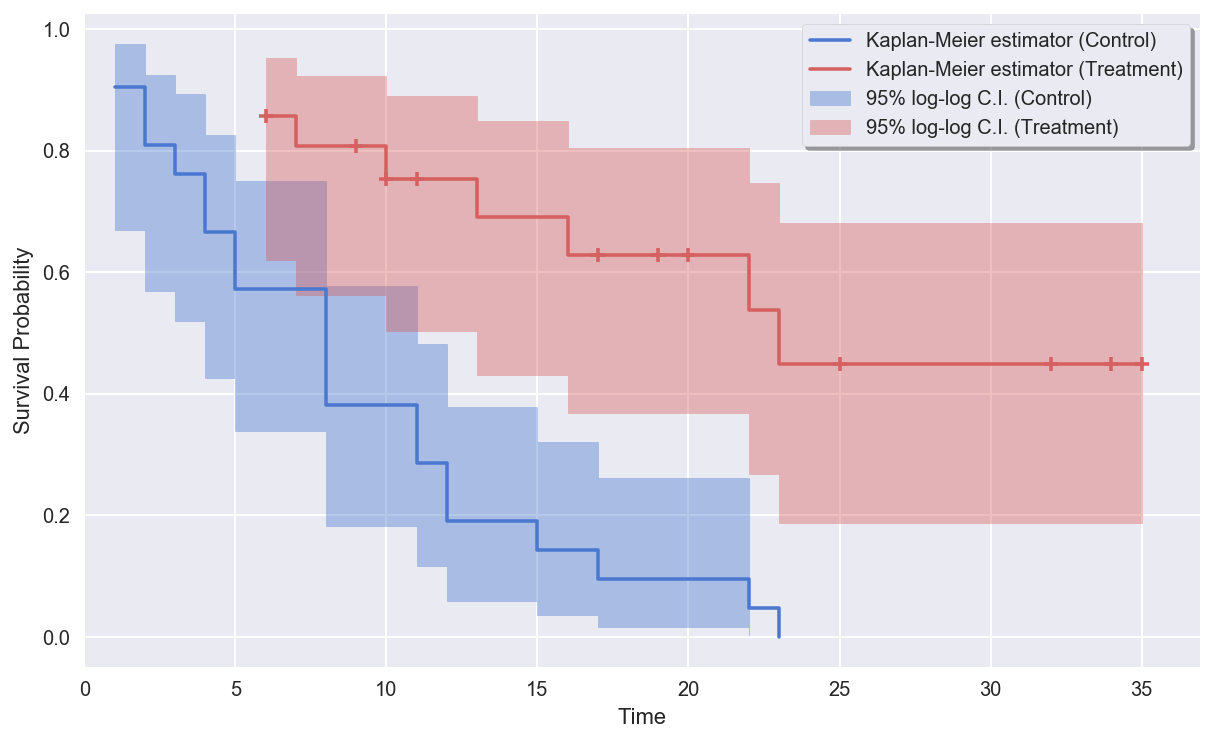

In [5]:
plt.figure(figsize=(10, 6))
km_leukemia.plot(colors=("b", "r"))
plt.show()
plt.close()

## Example 2. Channing House Data

This is the `channing` dataset in the R package [`boot`](https://cran.r-project.org/web/packages/boot/index.html).
From the package description:
>Channing House is a retirement centre in Palo Alto, California.
>These data were collected between the opening of the house in 1964 until July 1, 1975.
>In that time 97 men and 365 women passed through the centre.
>For each of these, their age on entry and also on leaving or death was recorded.
>A large number of the observations were censored mainly due to the resident being alive on July 1, 1975 when the data was collected.
>Over the time of the study 130 women and 46 men died at Channing House.
>Differences between the survival of the sexes, taking age into account, was one of the primary concerns of this study.

In [6]:
channing = datasets.channing()
print(channing.head(n=15).to_string(index=False))

Sex  Entry  Exit  Time  Event
Male    782   909   127      1
Male   1020  1128   108      1
Male    856   969   113      1
Male    915   957    42      1
Male    863   983   120      1
Male    906  1012   106      1
Male    955  1055   100      1
Male    943  1025    82      1
Male    943  1043   100      1
Male    837   945   108      1
Male    966  1009    43      1
Male    936   971    35      1
Male    919  1033   114      1
Male    852   869    17      1
Male   1073  1139    66      1


This time, we set `conf_type="log"` when initializing the Kaplan-Meier estimator.
This specifies that confidence intervals for the survival function estimates should be derived from confidence intervals for estimates of the negative logarithm of the survival function (i.e., the *cumulative hazard function*).

Unlike in the first example, we can pass the relevant columns of the Channing House dataset (the times, censoring indicators, and group labels) directly as parameters to the `fit()` method.

In [7]:
km_channing = KaplanMeier(conf_type="log")
km_channing.fit(channing.Exit, status=channing.Event, group=channing.Sex)

KaplanMeier(conf_type='log', conf_level=0.95, var_type='greenwood')

In [8]:
print(km_channing.data.counts)

        observations  events  censored
Female           365     130       235
Male              97      46        51


We separated the data into two groups by sex (`"Female"` and `"Male"`), and we can plot the survival curves of each group separately by specifying a group label in the call to `plot()`.
Also, since there is a lot of censoring in the data, we choose to omit the censoring markers by setting `mark_censor=False`.
Moreover, we can specify the `matplotlib.axes.Axes` on which to draw the plot using the `ax` parameter.

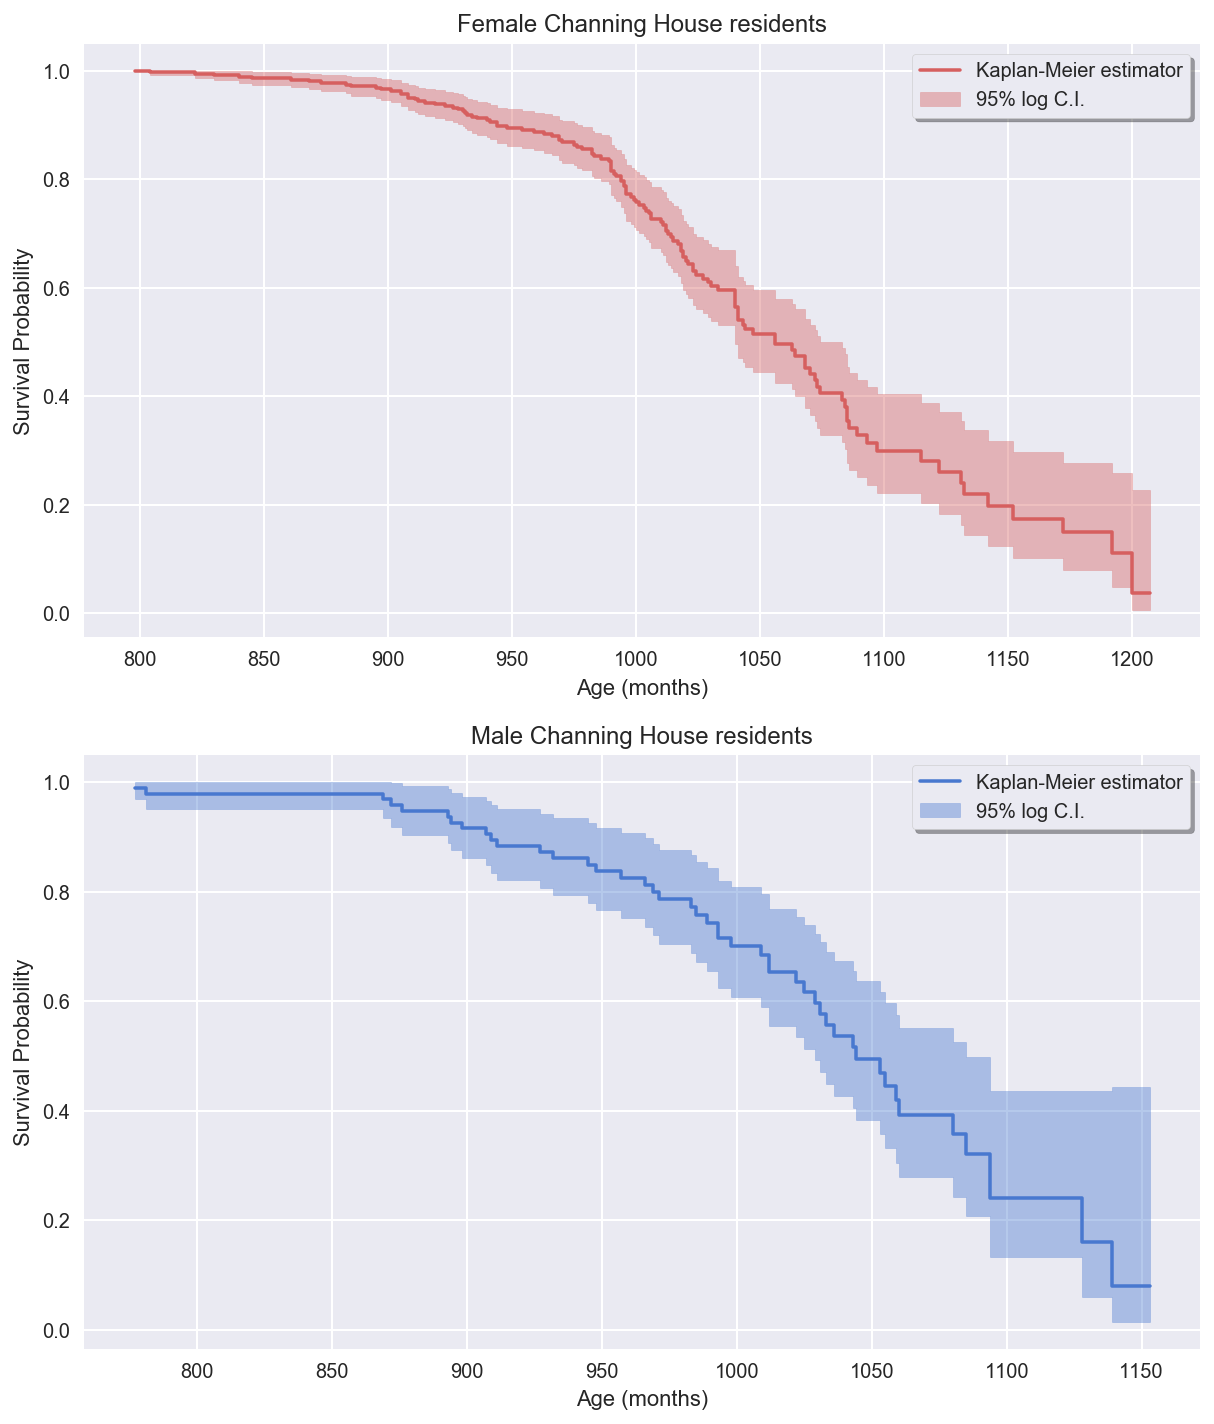

In [9]:
_, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

km_channing.plot("Female", mark_censor=False, color="r", ax=ax[0])
ax[0].set(title="Female Channing House residents")
ax[0].set(xlabel="Age (months)")

km_channing.plot("Male", mark_censor=False, color="b", ax=ax[1])
ax[1].set(title="Male Channing House residents")
ax[1].set(xlabel="Age (months)")

plt.show()
plt.close()

We can compare the two curves on the same plot without their confidence bands by setting `ci=False` in `plot()`.
In this plot, we pass a dictionary mapping group labels to colors as the `colors` parameter.

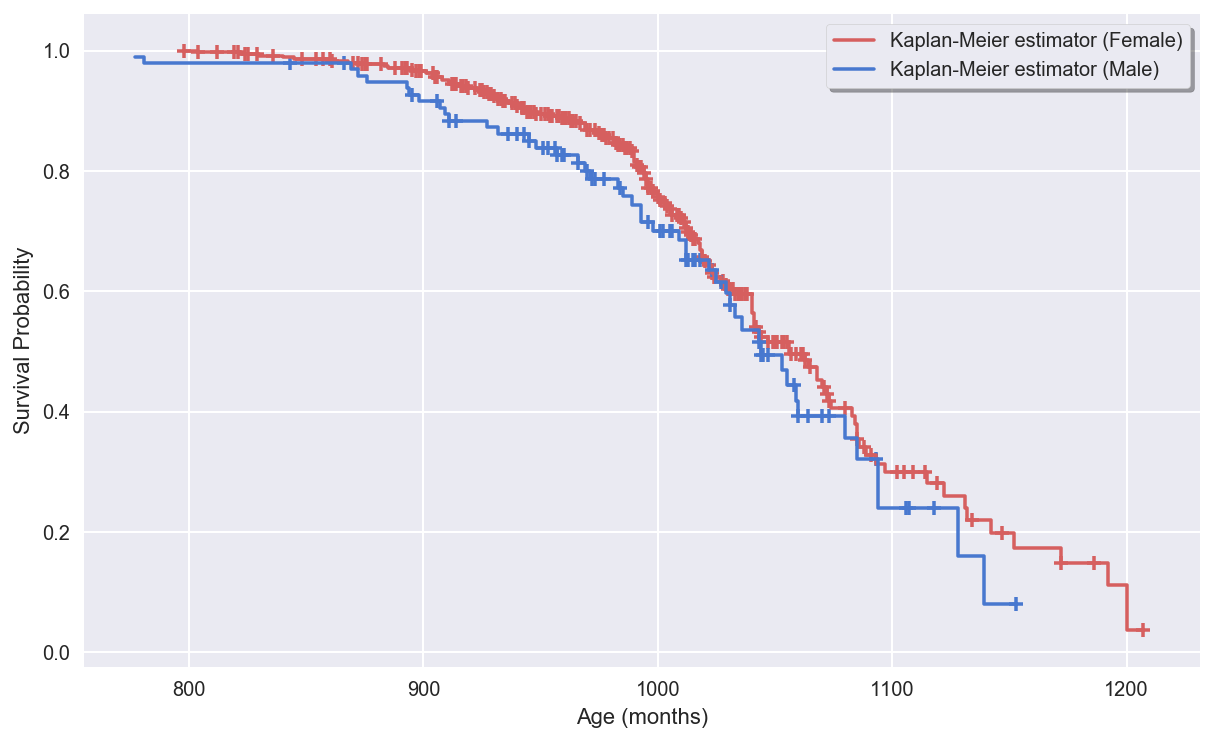

In [10]:
plt.figure(figsize=(10, 6))
km_channing.plot(ci=False, colors={"Female": "r", "Male": "b"})
plt.xlabel("Age (months)")
plt.show()
plt.close()

## Example 3. Simulated Gamma Data with Uniform Censoring

We generate a small sample from the gamma distribution and censor them with censoring times from a uniform distribution.
We know the underlying distribution (and its survival function), so it is interesting to see how well the Kaplan-Meier survival function estimate recovers the true survival function from the censored data.

In [11]:
# Underlying distribution of failure times
dist = st.gamma(a=3, scale=1)

# True failure times
failure = dist.rvs(size=50, random_state=0)

# Random censoring times
censor = st.uniform.rvs(loc=0, scale=5, size=len(failure), random_state=0)

# Observed times
time = np.minimum(failure, censor)

# Censoring indicator (0=censor, 1=failure)
status = (time == failure)

print(f"Proportion of censored data: {1 - np.mean(status):.1%}")

Proportion of censored data: 52.0%


This time we use ordinary normal approximation confidence intervals for the survival function estimates.

In [12]:
km = KaplanMeier(conf_type="linear")
km.fit(time, status=status)

KaplanMeier(conf_type='linear', conf_level=0.95, var_type='greenwood')

We plot both the true survival function and the estimated Kaplan-Meier survival function.
Looks like a decent fit despite over half the data being censored.

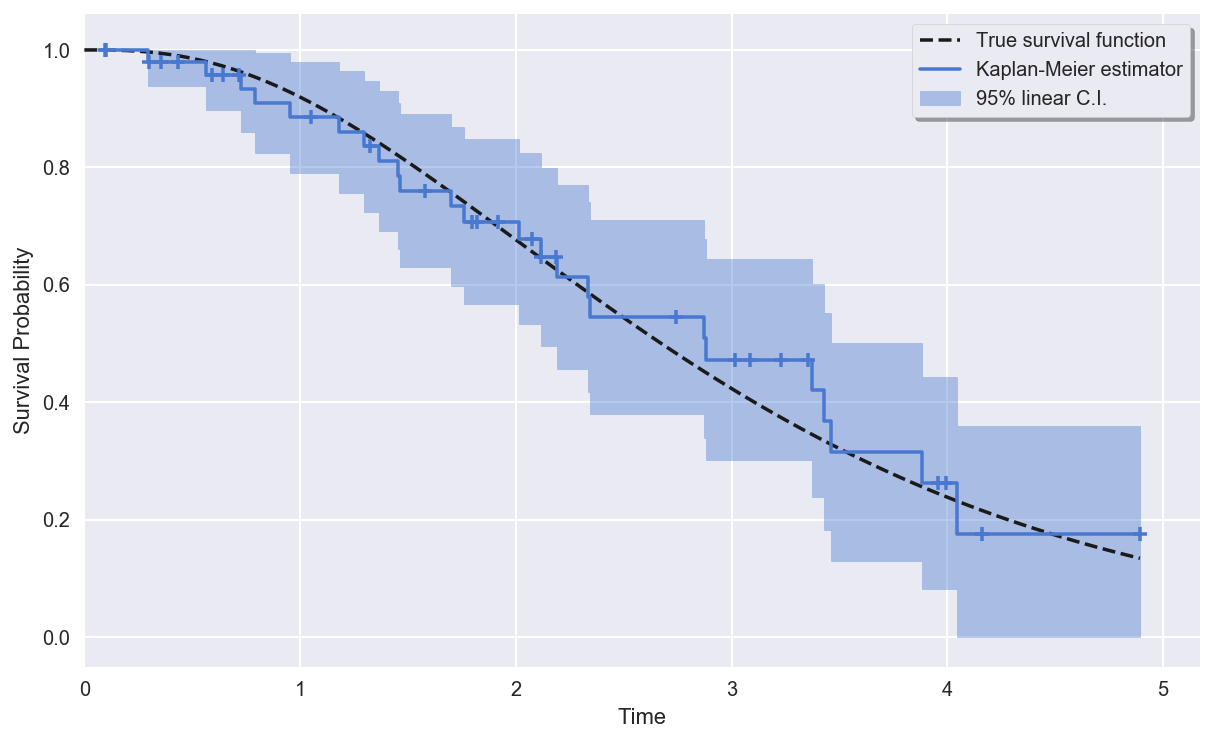

In [13]:
plt.figure(figsize=(10, 6))
x = np.linspace(0, max(time), num=100)
y = 1 - dist.cdf(x)
plt.plot(x, y, ls="--", c="k", label="True survival function")
km.plot()
plt.show()
plt.close()

## References

* E. L. Kaplan and P. Meier.
  "Nonparametric estimation from incomplete observations".
  Journal of the American Statistical Association, Volume 53, Issue 282 (1958), pp. 457--481.
  ([DOI](https://doi.org/10.2307/2281868))
* D. R. Cox and D. Oakes.
  Analysis of Survival Data.
  Chapman & Hall, London (1984), pp. ix+201.